## Regression

In [1]:
import pandas as pd
import numpy as np

import lime

import matplotlib.pyplot as plt

import random
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston

# 보스턴 데이터 DataFrame
boston = load_boston()

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [3]:
from sklearn.model_selection import train_test_split

# train, test 데이터셋 나눔
X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [4]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선언
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Test R^2 Score  : ", lr.score(X_test, y_test))
print("Train R^2 Score : ", lr.score(X_train, y_train))

Test R^2 Score  :  0.6687594935356329
Train R^2 Score :  0.7508856358979673


In [5]:
from lime import lime_tabular

# 회귀 문제를 설명하는 explainer 선언
explainer = lime_tabular.LimeTabularExplainer(
    X_train, mode="regression", feature_names= boston.feature_names
)

idx = random.randint(1, len(X_test))

print("Prediction : ", lr.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(X_test[idx], lr.predict, num_features=len(boston.feature_names))

from IPython.display import HTML

html_data = explanation.as_html()
HTML(data=html_data)

Prediction :  [40.50033966]
Actual :      50.0


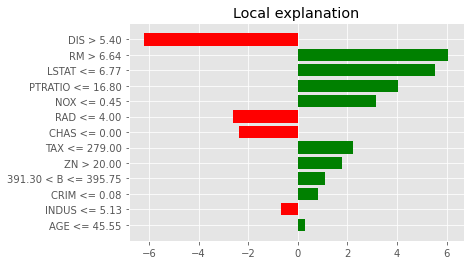

In [6]:
# positive와 negative를 예측하는 영향이 있는 값 시각화
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

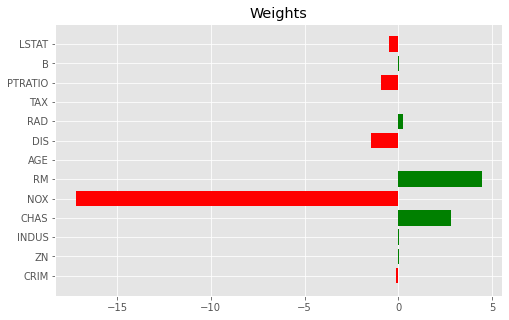

In [7]:
# 각 feauture의 가중치 값 출력
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(8,5))
    plt.barh(
        range(len(lr.coef_)), 
        lr.coef_, 
        color=["red" if coef<0 else "green" for coef in lr.coef_]
    )
    plt.yticks(range(len(lr.coef_)), boston.feature_names);
    plt.title("Weights")

## Classifier

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# 유방암 데이터 호출
breast_cancer = load_breast_cancer()

# train, test 데이터 나누기
X, y = breast_cancer.data, breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.90, test_size=0.1, stratify=y, random_state=123
)

# 선형 회귀모델 선언
lr = LogisticRegression()

lr.fit(X_train, y_train)

print("Test  Accuracy : %.2f"%lr.score(X_test, y_test))
print("Train Accuracy : %.2f"%lr.score(X_train, y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test, lr.predict(X_test)))
print()
print("Classification Report")
print(classification_report(y_test, lr.predict(X_test)))

Test  Accuracy : 0.95
Train Accuracy : 0.95

Confusion Matrix : 
[[20  1]
 [ 2 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [9]:
# 분류 문제를 설명하기 위한 explainer 호출
explainer = lime_tabular.LimeTabularExplainer(
    X_train, 
    mode="classification",
    class_names=breast_cancer.target_names,
    feature_names=breast_cancer.feature_names,
)

# 값 test의 한 개의 값을 Random으로 추출
idx = random.randint(1, len(X_test))

print("Prediction : ", breast_cancer.target_names[lr.predict(X_test[idx].reshape(1,-1))[0]])
print("Actual :     ", breast_cancer.target_names[y_test[idx]])

explanation = explainer.explain_instance(
    X_test[idx], 
    lr.predict_proba,
    num_features=len(breast_cancer.feature_names)
)

from IPython.display import HTML

html_data = explanation.as_html()
HTML(data=html_data)

Prediction :  benign
Actual :      benign


In [10]:
# 모델 예측이 잘 못 됐을때는 어떤식으로 설명하는지 보여줌
preds = lr.predict(X_test)

false_preds = np.argwhere((preds != y_test)).flatten()

idx = random.choice(false_preds)

print("Prediction : ", breast_cancer.target_names[lr.predict(X_test[idx].reshape(1,-1))[0]])
print("Actual :     ", breast_cancer.target_names[y_test[idx]])

explanation = explainer.explain_instance(X_test[idx], lr.predict_proba)

from IPython.display import HTML

html_data = explanation.as_html()
HTML(data=html_data)

Prediction :  malignant
Actual :      benign


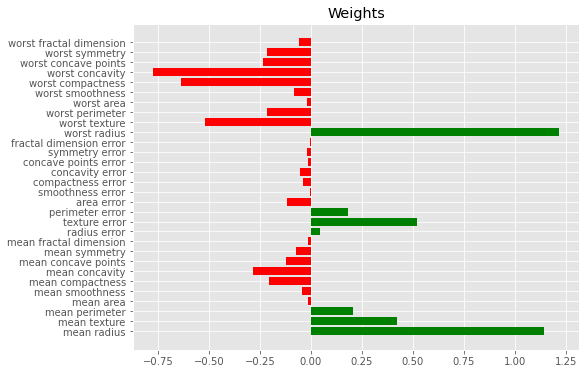

In [11]:
# 각 feature의 weight 값 시각화
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(8,6))
    plt.barh(
        range(len(lr.coef_[0])), 
        lr.coef_[0], 
        color=["red" if coef<0 else "green" for coef in lr.coef_[0]]
    )
    plt.yticks(range(len(lr.coef_[0])), breast_cancer.feature_names);
    plt.title("Weights")